In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
data=pd.read_csv("Hotel_Reservations.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [5]:
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [6]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


Booking ID is not useful, so remove it

In [7]:
data.drop("Booking_ID",axis=1,inplace=True)
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


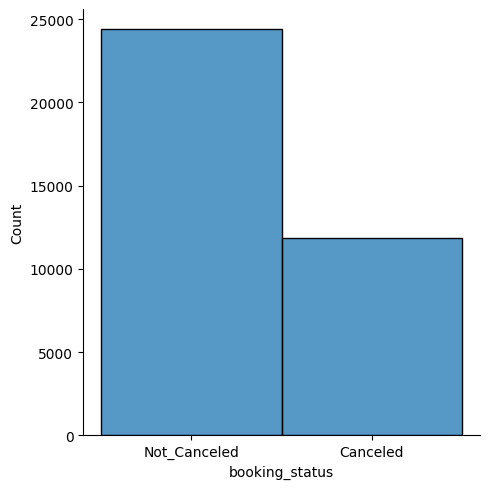

In [8]:
sns.displot(data["booking_status"])
plt.show()

booking status is skewed

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_val=train_test_split(data,test_size=0.2,stratify=data["booking_status"])

In [10]:
x_train["no_of_adults"].value_counts()

2    20816
1     6234
3     1843
0      114
4       13
Name: no_of_adults, dtype: int64

Number of adults=0 makes no sense

In [11]:
x_train["no_of_children"].value_counts()

0     26906
1      1273
2       827
3        11
9         2
10        1
Name: no_of_children, dtype: int64

In [12]:
x_train["no_of_weekend_nights"].value_counts()

0    13474
1     7999
2     7269
3      123
4      109
5       31
6       14
7        1
Name: no_of_weekend_nights, dtype: int64

In [13]:
x_train["no_of_week_nights"].value_counts()

2     9224
1     7522
3     6277
4     2388
0     1917
5     1275
6      151
7       87
10      57
8       49
9       30
11      15
12       9
15       8
14       6
17       2
16       2
13       1
Name: no_of_week_nights, dtype: int64

In [14]:
x_train[x_train["no_of_week_nights"]==16]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
19745,1,0,6,16,Meal Plan 1,0,Room_Type 4,31,2018,3,3,Online,0,0,0,98.93,1,Canceled
34092,2,0,6,16,Not Selected,0,Room_Type 1,14,2018,2,3,Online,0,0,0,64.05,0,Canceled


In [15]:
x_train["type_of_meal_plan"].value_counts()

Meal Plan 1     22302
Not Selected     4073
Meal Plan 2      2641
Meal Plan 3         4
Name: type_of_meal_plan, dtype: int64

In [16]:
x_train["required_car_parking_space"].value_counts()

0    28107
1      913
Name: required_car_parking_space, dtype: int64

In [17]:
x_train["room_type_reserved"].value_counts()

Room_Type 1    22504
Room_Type 4     4857
Room_Type 6      759
Room_Type 2      555
Room_Type 5      220
Room_Type 7      120
Room_Type 3        5
Name: room_type_reserved, dtype: int64

In [18]:
x_train["lead_time"].value_counts()

0      1012
1       849
2       515
3       503
4       494
       ... 
350       1
324       1
348       1
325       1
352       1
Name: lead_time, Length: 348, dtype: int64

Too many values are there, so hist

<AxesSubplot: xlabel='lead_time'>

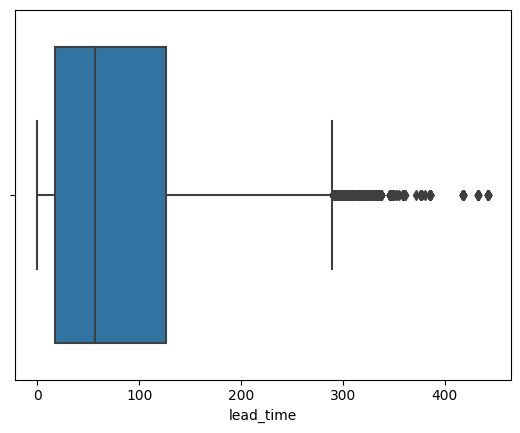

In [19]:
sns.boxplot(x=x_train["lead_time"])

In [20]:
x_train["arrival_year"].value_counts()

2018    23785
2017     5235
Name: arrival_year, dtype: int64

In [21]:
x_train["arrival_month"].value_counts()

10    4258
9     3686
8     3033
6     2591
12    2427
11    2365
7     2332
4     2176
5     2086
3     1893
2     1364
1      809
Name: arrival_month, dtype: int64

In [22]:
x_train["arrival_date"].value_counts()

13    1093
4     1089
19    1081
17    1059
2     1051
20    1030
16    1026
15    1019
6     1007
14     997
8      989
30     982
18     981
12     966
29     951
21     929
5      924
26     919
25     911
1      908
9      895
28     894
10     892
7      884
24     882
11     879
3      869
27     836
22     824
23     785
31     468
Name: arrival_date, dtype: int64

hist because of many values

<AxesSubplot: xlabel='arrival_date'>

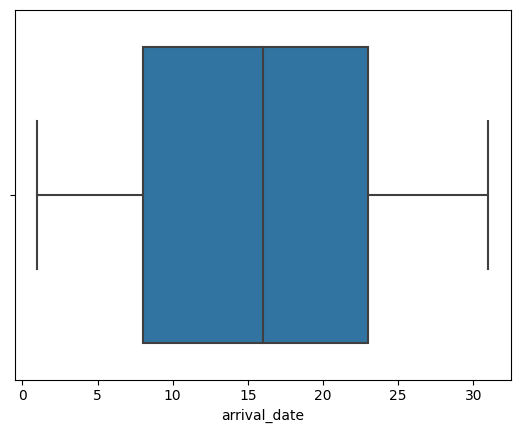

In [23]:
sns.boxplot(x=x_train["arrival_date"])

In [24]:
x_train["market_segment_type"].value_counts()

Online           18518
Offline           8446
Corporate         1632
Complementary      317
Aviation           107
Name: market_segment_type, dtype: int64

In [25]:
x_train["repeated_guest"].value_counts()

0    28245
1      775
Name: repeated_guest, dtype: int64

In [26]:
x_train["no_of_previous_cancellations"].value_counts()

0     28735
1       171
3        38
2        35
11       22
5         9
4         5
13        4
6         1
Name: no_of_previous_cancellations, dtype: int64

In [27]:
x_train["no_of_previous_bookings_not_canceled"].value_counts()

0     28344
1       198
2        98
3        59
4        52
5        51
6        30
7        20
8        19
9        16
10       16
11       14
12       11
15        7
14        7
19        6
13        6
22        5
17        5
20        5
16        4
21        4
18        3
25        3
23        2
27        2
28        2
24        2
48        2
31        2
44        2
29        2
53        1
35        1
55        1
37        1
26        1
36        1
56        1
58        1
54        1
32        1
41        1
30        1
34        1
39        1
33        1
42        1
45        1
49        1
43        1
50        1
57        1
Name: no_of_previous_bookings_not_canceled, dtype: int64

hist

In [28]:
x_train["avg_price_per_room"].value_counts()

65.00     687
75.00     651
90.00     559
95.00     546
115.00    518
         ... 
75.28       1
113.87      1
47.78       1
56.38       1
119.67      1
Name: avg_price_per_room, Length: 3470, dtype: int64

hist

<AxesSubplot: xlabel='avg_price_per_room'>

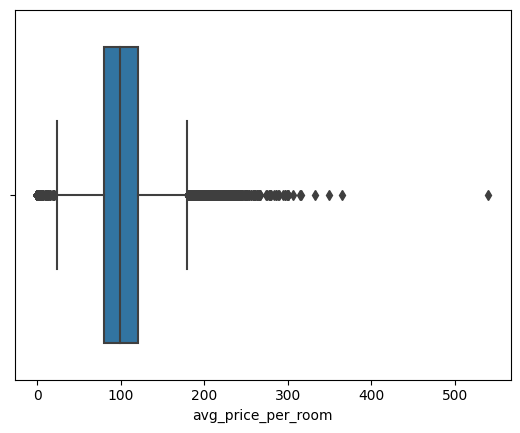

In [29]:
sns.boxplot(x=x_train["avg_price_per_room"])

In [30]:
x_train["no_of_special_requests"].value_counts()

0    15930
1     9059
2     3427
3      537
4       62
5        5
Name: no_of_special_requests, dtype: int64

In [31]:
x_train["booking_status"].value_counts()

Not_Canceled    19512
Canceled         9508
Name: booking_status, dtype: int64

In [32]:
x_train["booking_status"].value_counts(normalize=True)

Not_Canceled    0.672364
Canceled        0.327636
Name: booking_status, dtype: float64

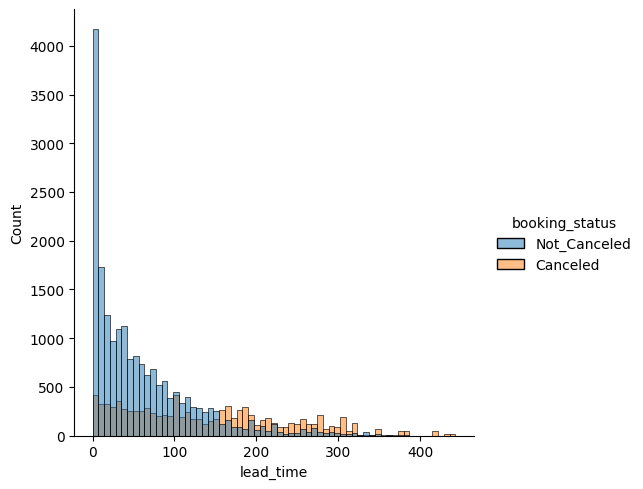

In [34]:
sns.displot(x=x_train["lead_time"],hue=x_train["booking_status"])